# load and import

In [1]:
R.version.string
library('dplyr')

library('stringr')
library('tidyr')
library('ggplot2')

library(ggh4x)
# library(tidyverse)
# Load necessary libraries
# library(magick)
library(cowplot)
library(patchwork)
library(gridExtra)
library(png)
library(grid)

[1] "R version 4.3.1 (2023-06-16)"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT1G22860,VPS3
AT3G19900,AT3G19900


In [3]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

# GO terms

In [4]:
GO_ID_terms <-  readRDS('../Pathway_plot//Rdata/GO_ID_terms.rds')

In [5]:
JA <- GO_ID_terms %>% filter(GO_ID == 'GO:0009753', code != 'IEA') %>% select(AGI)

In [6]:
PCD <- GO_ID_terms %>% filter(GO_ID == 'GO:0012501', code != 'IEA') %>% select(AGI)

**<span style="color:red">### remove TIR  and P-loop, only have 2 AGI</span>**


# Pathways

In [7]:
updated_NLRs_table <- read.csv("../gene_table_and_other_scripts/Col-0_NLRs_167_Ya-Long_Donghui_20240321.csv") %>% 
    select(AGI, Primary.Gene.Symbol)

In [8]:
NLRs_and_TIRs <- read.csv(file = "../gene_table_and_other_scripts/NLRs_and_TIR_only.csv") 

In [9]:
Pathways_Ngou_2021 <- readxl::read_excel("../gene_table_and_other_scripts/Ngou_2021_Nature_figure2E_pathways_mod.xlsx")

In [10]:
Pathways <- Pathways_Ngou_2021 %>% dplyr::select(Target, GeneFamily)
Pathways <- Pathways %>%as.data.frame  %>% dplyr::rename('AGI' = 'Target')
LRRs <- Pathways %>% filter(GeneFamily %>% str_detect('LRR'))

In [11]:
LRRs

AGI,GeneFamily
<chr>,<chr>
AT1G51820,LRR-RLKs
AT2G19190,LRR-RLKs
AT1G17750,LRR-RLKs
AT1G55610,LRR-RLKs
AT1G51890,LRR-RLKs
AT1G74360,LRR-RLKs
AT1G73080,LRR-RLKs
AT3G13380,LRR-RLKs
AT1G56140,LRR-RLKs


## add GO terms

# Res

In [12]:
Res_adr1s <-  readRDS('../JC14_and_DMs/Rdata/Res_adr1.rds')
Res_3DM <-  readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds')
Res_3DM_and_adr1s <- Res_3DM  %>% rbind(Res_adr1s)

In [13]:
Res_2DM <- Res_3DM %>% filter(contrast %>% str_detect('DM1/DM2d|DM6/DM7'))

In [14]:
Res_Pathogen <- readRDS('../RNA_seq_Pathogen/Rds_Rdata_hisat2//Res2023-04-21 15:54:40.rdata') %>% filter(Contrast %>% str_detect('Mock') ) %>%filter(Contrast %>% str_detect('Avr'))
Res_Pathogen <- Res_Pathogen %>% select(Gene, log2FoldChange, Contrast)  %>% dplyr::rename('source' = 'Contrast', 'AGI' = 'Gene')

In [15]:
Res_Pathogen %>% distinct()

AGI,log2FoldChange,source
<chr>,<dbl>,<chr>
AT1G30814,-0.829686864,AvrRpt2-6h_vs_Mock-6h
AT1G78930,-0.011894928,AvrRpt2-6h_vs_Mock-6h
AT1G71695,-0.098855557,AvrRpt2-6h_vs_Mock-6h
AT1G58983,0.083782797,AvrRpt2-6h_vs_Mock-6h
AT1G12980,-2.460711255,AvrRpt2-6h_vs_Mock-6h
AT1G56250,0.254901801,AvrRpt2-6h_vs_Mock-6h
AT1G69810,0.661998002,AvrRpt2-6h_vs_Mock-6h
AT1G72450,1.784604326,AvrRpt2-6h_vs_Mock-6h
AT1G76280,-0.340306572,AvrRpt2-6h_vs_Mock-6h


In [16]:
Res_adr1s <-  readRDS('../JC14_and_DMs/Rdata/Res_adr1.rds')
Res_adr1s <-  Res_adr1s %>% select(AGI, log2FoldChange, line) %>% dplyr::rename('source' = 'line')

Res_3DM <-  readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds')
Res_3DM <- Res_3DM %>% select(AGI, log2FoldChange, line)%>% dplyr::rename('source' = 'line')

# Res_Pathogen <- readRDS('../RNA_seq_Pathogen/Rds_Rdata_hisat2//Res2023-04-21 15:54:40.rdata')
# Res_Pathogen <- Res_Pathogen %>% select(Gene, log2FoldChange, Contrast)  %>% dplyr::rename('source' = 'Contrast', 'AGI' = 'Gene')
# Res_Pathogen <- Res_Pathogen %>% filter( source %>% str_detect('control', negate = T) )# %>% pull(source) %>% unique

Res_combined <- Res_3DM %>% rbind(Res_Pathogen)  %>% rbind(Res_adr1s)
Res_combined <- Res_combined %>% dplyr::rename('log2FC' = 'log2FoldChange')
Res_combined <- Res_combined %>% mutate(source = source %>% str_remove('_vs_Mock-\\d{1,2}h$'))

In [17]:
Res_combined %>% pull(source) %>% unique

[1] "DM6/DM7"        "DM1/DM2d"       "DM10/DM11"      "AvrRpt2-6h"    
 [5] "AvrRpt2-12h"    "AvrRpt2-20h"    "AvrRps4-6h"     "AvrRps4-12h"   
 [9] "AvrRps4-20h"    "DM1/DM2d_adr1s" "DM6/DM7_adr1s"  "Col-0_adr1s"

In [18]:
Res_combined <- Res_combined %>% mutate(source = factor(source, levels = c('DM10/DM11','DM1/DM2d','DM1/DM2d_adr1s','DM6/DM7','DM6/DM7_adr1s','Col-0_adr1s','AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h')) )
Res_combined$source %>% unique

[1] DM6/DM7        DM1/DM2d       DM10/DM11      AvrRpt2-6h     AvrRpt2-12h   
 [6] AvrRpt2-20h    AvrRps4-6h     AvrRps4-12h    AvrRps4-20h    DM1/DM2d_adr1s
[11] DM6/DM7_adr1s  Col-0_adr1s   
12 Levels: DM10/DM11 DM1/DM2d DM1/DM2d_adr1s DM6/DM7 ... AvrRps4-20h

In [19]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67")

In [20]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                 "DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s' = '#008DFA' , 'DM1/DM2d_adr1s' = '#008DFA', 
                 'Col-0_adr1s' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655")

theme_custom <- function() {
  theme(
    text = element_text(family = "Arial", size = 8, face = "plain"),  # Set face = "plain" for all text
    axis.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for axis titles
    axis.text = element_text(family = "Arial", size = 8, face = "plain"),   # Overrides for axis text
    legend.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend titles
    legend.text = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend text
    strip.text.x = element_text(family = "Arial", size = 8, face = "plain"),  # Specific adjustment for x facet label
    strip.text.y = element_text(family = "Arial", size = 8, angle = 0, face = "plain")  # Specific adjustment for y facet label
  )
}


# Bar plot of NLRs

In [21]:
Res_combined %>% filter(AGI  == 'AT4G14390')

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT4G14390,6.35565974,DM6/DM7
AT4G14390,8.05872953,DM1/DM2d
AT4G14390,8.98735730,DM10/DM11
AT4G14390,0.04927757,AvrRpt2-6h
AT4G14390,0.00000000,AvrRpt2-12h
AT4G14390,0.17014255,AvrRpt2-20h
AT4G14390,0.06511173,AvrRps4-6h
AT4G14390,3.58068134,AvrRps4-12h
AT4G14390,1.63150265,AvrRps4-20h


In [22]:
library(glue)
library(ggtext)

In [23]:
options(repr.plot.width=8, repr.plot.height=4)
cols_text <- c( 'TIR-NBS-LRR' =  "#386cb0",
          'TIR'= "#a6cee3", "TIR-NBS" = "#2581ba",
          
          "CC-NBS-LRR" = "#fdb462",'CC-NBS' =  "#fb9a99", 'RPW8-NBS-LRR' = "#984ea3",
          
          'NBS-LRR' = "#b3b330", 
          'P-loop' = "#7fc97f"
         )

# show_col(cols_text, ncol = 6)
# cols_text
cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% rename(label_color = 2)

In [24]:
Res_NLRs <- Res_combined %>% right_join(NLRs_and_TIRs, by = 'AGI')

In [25]:
Res_NLRs <- Res_NLRs %>% 
    mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    left_join(cols_text_2, by = 'Class')  

In [26]:
# Extract plot_label and label_color from Res_NLRs_up
plot_label_color <- Res_NLRs %>% select(plot_label, label_color)

# Create a named list with label_color as content and plot_label as names
color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)


In [27]:
Res_NLRs_color <- Res_NLRs %>% mutate(label_color_markdown =
        glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 


In [28]:
Res_NLRs_color

AGI,log2FC,source,Class,Symbol,Organization,plot_label,label_color,label_color_markdown
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>
AT1G56540,0.73768310,DM6/DM7,TIR-NBS-LRR,AT1G56540,clustered,AT1G56540,#386cb0,<i style='color: #386cb0'>AT1G56540</i>
AT1G63360,0.09548923,DM6/DM7,CC-NBS-LRR,AT1G63360,clustered,AT1G63360,#fdb462,<i style='color: #fdb462'>AT1G63360</i>
AT1G53350,0.74051156,DM6/DM7,CC-NBS-LRR,AT1G53350,NA,AT1G53350,#fdb462,<i style='color: #fdb462'>AT1G53350</i>
AT1G58848,1.66607221,DM6/DM7,CC-NBS-LRR,AT1G58848,NA,AT1G58848,#fdb462,<i style='color: #fdb462'>AT1G58848</i>
AT1G63880,0.90581650,DM6/DM7,TIR-NBS-LRR,AT1G63880,clustered,AT1G63880,#386cb0,<i style='color: #386cb0'>AT1G63880</i>
AT1G61300,-1.09160953,DM6/DM7,NBS-LRR,AT1G61300,clustered,AT1G61300,#b3b330,<i style='color: #b3b330'>AT1G61300</i>
AT1G63740,0.81169961,DM6/DM7,TIR-NBS-LRR,AT1G63740,clustered,AT1G63740,#386cb0,<i style='color: #386cb0'>AT1G63740</i>
AT1G27170,0.35303205,DM6/DM7,TIR-NBS-LRR,AT1G27170,clustered,AT1G27170,#386cb0,<i style='color: #386cb0'>AT1G27170</i>
AT1G31540,1.20302747,DM6/DM7,TIR-NBS-LRR,AT1G31540,singleton,AT1G31540,#386cb0,<i style='color: #386cb0'>AT1G31540</i>


<i style='color: #386cb0'>AT1G65850</i>

<i style='color: green'>the idea here is that pre set order x = reorder(label_color_markdown, log2FoldChange) is not preserved, I have to plot 3 geom_bar first, then put the hundreds layers of each NLRs geom_bar over it. </i>

In [29]:
keep_NLRs <-  c (Res_NLRs_color %>% filter(abs(log2FC) > 2) %>% pull(AGI) %>% unique(),
                 'AT5G66900') #add nrg1.1

In [30]:
Res_NLRs_color <- Res_NLRs_color %>% dplyr::filter(AGI %in% keep_NLRs )
Res_NLRs_color <- Res_NLRs_color %>% arrange(desc(log2FC))

In [31]:
Res_NLRs_color <- Res_NLRs_color %>% mutate(category = source %>% str_remove('_adr1s') %>% str_remove('-\\d{1,2}h$'))

In [32]:
each_NLR_max_log2FC <- Res_NLRs_color %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>% arrange(desc(log2FC))

In [33]:
each_NLR_Col_log2FC <- Res_NLRs_color %>% filter(source == 'Col-0_adr1s' ) %>%
     arrange(desc(log2FC))

In [34]:
Res_NLRs_color <- Res_NLRs_color %>% mutate(source = source %>% str_replace('DM6/DM7$', 'DM6/DM7 vs Col-0') %>%
        str_replace('DM6/DM7_adr1s', 'DM6/DM7_adr1s vs Col-0') %>%
        str_replace('DM1/DM2d$', 'DM1/DM2d vs Col-0') %>% str_replace('DM1/DM2d_adr1s', 'DM1/DM2d_adr1s vs Col-0') %>%
        str_replace('Col-0_adr1s', 'Col-0_adr1s vs Col-0')
                         )

In [35]:
options(repr.plot.width=8.4, repr.plot.height=6, repr.plot.res = 50)


plot_NLRs_overlay_bar <- function(Res = Res_NLRs_color, Res_base = each_NLR_Col_log2FC,  alpha = 0.6, facet_row = "Class", facet_col = "category") {
  library(purrr)
  library(rlang) # for sym()

  # Convert facet strings to symbols
  facet_row <- sym(facet_row)
  facet_col <- sym(facet_col)
  
  # Step 1: Split the dataframe based on log2FoldChange
  over0 <- Res %>% filter(log2FC > 0) 
  below0 <- Res %>% filter(log2FC <= 0)

  # Step 2: Create a list to store the dataframes for each layer
  layers <- list()

  # Step 3: Iterate until there are no rows left in over0 and below0
  layer_num <- 1
  while (nrow(over0) > 0 || nrow(below0) > 0) {
    max_over0 <- over0 %>% group_by( AGI) %>% slice_max(log2FC)
    min_below0 <- below0 %>% group_by( AGI) %>% slice_min(log2FC)

    over0 <- suppressMessages(anti_join(over0, max_over0))
    below0 <- suppressMessages(anti_join(below0, min_below0))

    layer <- bind_rows(max_over0, min_below0)
    layers[[layer_num]] <- layer

    layer_num <- layer_num + 1
  }

  # Step 4: Use the layers list to add new layers to the ggplot using geom_bar
  bar_NLRs_base <- Res %>%
    ggplot(aes(x = reorder(label_color_markdown, log2FC), y = log2FC, label = label_color_markdown)) +
    labs(y = "Log2 FoldChange") +
    coord_flip() +
    guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
    scale_y_continuous(breaks = c(-8,-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16),
                       expand = c(0, 0)) +
    scale_fill_manual(values = bar_colors)+
    theme_Publication() +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 8),
          axis.title.y = element_blank()) +
    theme(text = element_text(size = 8, family = "Arial"), 
          strip.text = element_text(size = 12)) +
    facet_grid(rows = vars(!!facet_row), cols = vars(!!facet_col), scales = "free", space = "free") + # use !! to evaluate symbols
    theme(axis.text.y = element_markdown())   +
    geom_bar(data = Res_base,
                 position="identity", stat='identity', aes(fill=source), width = .8,  alpha = 0 ) 

  bar_NLRs <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               aes(fill = source),
               width = .8,
               alpha = alpha)
  }, .init = bar_NLRs_base)
  bar_NLRs <- bar_NLRs + geom_hline(yintercept=0,  color = "black", size=0.5)
  # Return the final plot
  return(bar_NLRs)
}



In [36]:
NLRs_in_connectivity_table <- read.csv('../Pathogen_JC14_3DM/WGCNA_output_all/NLRs_and_TIRs_connectivity_table_info.csv') 

In [37]:
NLRs_in_connectivity_table %>% group_by(module) %>% summarise(count = n())

module,count
<chr>,<int>
MEblue,1
MEcyan,37
MEdarkgreen,1
MEgreenyellow,7
MEmidnightblue,1
MEpurple,2
MEsalmon,9


In [38]:
Res_NLRs_in_connectivity_table <- NLRs_in_connectivity_table %>% dplyr::rename('AGI' = 'gene') %>% 
    left_join(Res_NLRs_color, by = 'AGI') %>% filter(category != 'DM10/DM11') %>% distinct

In [39]:
Res_NLRs_in_connectivity_table <- Res_NLRs_in_connectivity_table %>% mutate(module = factor(module, levels = c('MEblue','MEpurple','MEdarkturquoise',   'MEcyan','MEdarkred',
            'MEgreenyellow','MEsalmon','MEtan','MEdarkgreen','MEmidnightblue') %>% rev()))

In [40]:
Res_NLRs_in_connectivity_table_Col <- Res_NLRs_in_connectivity_table %>% 
        filter(source == 'Col-0_adr1s vs Col-0' ) %>% arrange(desc(log2FC))

In [41]:
Res_NLRs_in_connectivity_table %>% pull(AGI) %>% unique() %>% length

[1] 46

In [42]:
Res_NLRs_in_connectivity_table  

AGI,connectivity_rowSums_adj,module,gene_name,DM6.DM7,DM1.DM2d,DM10.DM11,AvrRpt2.6h,AvrRpt2.12h,AvrRpt2.20h,⋯,Organization.x,log2FC,source,Class,Symbol.y,Organization.y,plot_label,label_color,label_color_markdown,category
<chr>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>,<chr>
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,3.1036966,AvrRpt2-20h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRpt2
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,2.8122337,AvrRps4-20h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRps4
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,2.5815041,DM1/DM2d vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM1/DM2d
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,2.1317400,DM6/DM7 vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM6/DM7
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,2.0996460,DM1/DM2d_adr1s vs Col-0,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,DM1/DM2d
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,1.7994546,AvrRpt2-12h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRpt2
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,1.6284234,AvrRps4-12h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRps4
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,0.8091689,AvrRpt2-6h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRpt2
AT1G72900,1892.695,MEcyan,TN7,2.1317400,2.5815041,5.941569,0.8091689,1.799455,3.103697,⋯,clustered,0.7525973,AvrRps4-6h,TIR-NBS,TN7,clustered,TN7_AT1G72900,#2581ba,<i style='color: #2581ba'>TN7_AT1G72900</i>,AvrRps4


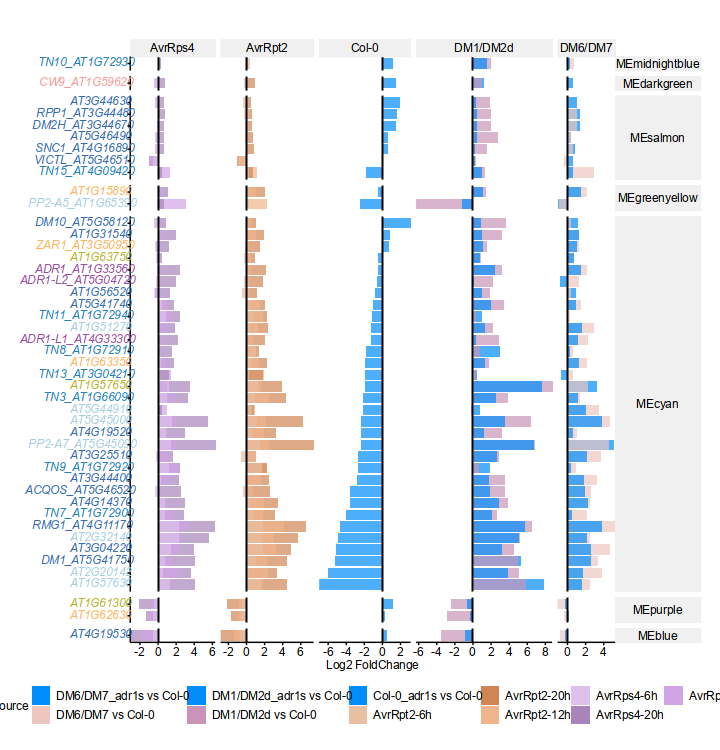

In [66]:


theme_custom <- function() {
  theme(
    text = element_text(family = "Arial", size = 8, face = "plain"),  # Set face = "plain" for all text
    axis.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for axis titles
    axis.text = element_text(family = "Arial", size = 8, face = "plain"),   # Overrides for axis text
    legend.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend titles
    legend.text = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend text
    strip.text.x = element_text(family = "Arial", size = 8, face = "plain"),  # Specific adjustment for x facet label
    strip.text.y = element_text(family = "Arial", size = 8, angle = 0, face = "plain")  # Specific adjustment for y facet label
  )
}



width_ = 7.2
height_ = 7.5
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 100)

bar_NLRs_plot <- plot_NLRs_overlay_bar(Res = Res_NLRs_in_connectivity_table , 
                      Res_base = Res_NLRs_in_connectivity_table_Col, 
                      facet_row = "module", alpha = 0.7) + 
                theme( strip.text.y = element_text(angle = 0)) + theme_custom() # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_NLRs_plot
bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_NLRs", Sys.time(), ".pdf"),
                         width = width_ , height = height_)
# bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_NLRs", Sys.time(), ".png"), width = 14 , height = 10)

In [89]:
merged_l2FC_other_papers <- readRDS("generated_data/merged_l2FC_clean.rds")

merged_l2FC_other_papers <- merged_l2FC_other_papers %>% dplyr::select(-gene_name) %>% dplyr::rename('source' = 'condition', 'AGI' = 'gene_id')

merged_l2FC_other_papers %>% sample_n(10)

AGI,source,log2FC
<chr>,<chr>,<dbl>
AT3G06210,hos15,-0.28801114
AT4G07170,ka120,1.64134732
AT1G22882,dm2h_NIL,1.78760959
AT3G12590,ssi2-2,-1.58640768
AT5G38130,hos15,-2.09006021
AT1G08023,ka120,0.00000000
AT3G45420,hos15,-0.47826319
AT2G44090,acd6_9am,0.01601911
AT5G25590,ssi2-3,0.03135077


#### remove Avrs and DM10/DM11

In [90]:
Res_combined2 <- Res_combined %>% rbind(merged_l2FC_other_papers)

In [91]:
Res_combined_symbol <- Res_combined2 %>% left_join(map_id_name, by = c('AGI' = 'gene_id')) %>% dplyr::rename('Symbol' = 'gene_name')  %>% mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') )  %>% mutate(category = source %>% str_remove('_adr1s') %>% str_remove('-\\d{1,2}h$'))

In [92]:
Res_combined_symbol %>% sample_n(20)

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>
AT1G28040,-2.811402071,Col-0_adr1s,ATL20,ATL20_AT1G28040,Col-0
AT1G51340,0.006934559,AvrRps4-12h,MATE,MATE_AT1G51340,AvrRps4
AT1G79310,5.052377048,AvrRps4-20h,MC7,MC7_AT1G79310,AvrRps4
AT5G28770,0.005672941,AvrRps4-6h,BZO2H3,BZO2H3_AT5G28770,AvrRps4
AT5G25350,0.541320721,AvrRps4-20h,EBF2,EBF2_AT5G25350,AvrRps4
AT3G02555,-0.023958999,acd6_9am,AT3G02555,AT3G02555,acd6_9am
AT1G54290,0.182956925,acd6_9am,AT1G54290,AT1G54290,acd6_9am
AT4G16880,0.118583610,ssi2-3,NTCD4,NTCD4_AT4G16880,ssi2-3
AT1G42470,-0.107531650,AvrRps4-20h,ATNPC1-1,ATNPC1-1_AT1G42470,AvrRps4


In [93]:
Res_combined_symbol <- Res_combined_symbol  %>% 
    filter(str_detect(category, '^DM1\\/') | str_detect(category, '^DM6\\/') |
           str_detect(category, '^Col-0') | str_detect(category, '^ssi2-1') |
          str_detect(category, '^bak') | str_detect(category, '^acd6_9am')
          
          ) 

In [94]:
Res_combined_symbol %>% group_by(source, category) %>% slice_head(n=1) 

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>
AT1G30814,5.3470964,DM1/DM2d,AT1G30814,AT1G30814,DM1/DM2d
AT2G18540,45.2429786,DM1/DM2d_adr1s,AT2G18540,AT2G18540,DM1/DM2d
AT1G30814,5.1845962,DM6/DM7,AT1G30814,AT1G30814,DM6/DM7
AT1G04560,34.5727113,DM6/DM7_adr1s,AT1G04560,AT1G04560,DM6/DM7
AT2G41260,25.8170407,Col-0_adr1s,M17,M17_AT2G41260,Col-0
AT1G30814,0.2662770,acd6_9am,AT1G30814,AT1G30814,acd6_9am
AT1G30814,Inf,bak1serk4,AT1G30814,AT1G30814,bak1serk4
AT1G78930,0.3708034,ssi2-1,MTERF16,MTERF16_AT1G78930,ssi2-1


In [95]:
# First, define the order you want
category_order <- c("acd6_9am", "bak1serk4", "ssi2-1", "Col-0", "DM1/DM2d", "DM6/DM7")

# Then, convert the category column to a factor with this order
Res_combined_symbol <- Res_combined_symbol %>%
  mutate(category = factor(category, levels = category_order))

In [96]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

# Adding new warm colors for the missing autoimmunity-related sources
bar_colors <- c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                'DM10/DM11' = '#D1CDE6', 
                'DM6/DM7_adr1s vs Col-0' = '#008DFA', 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                'Col-0_adr1s vs Col-0' = '#008DFA',
                "DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                'DM10/DM11' = '#D1CDE6', 
                'DM6/DM7_adr1s' = '#008DFA', 'DM1/DM2d_adr1s' = '#008DFA', 
                'Col-0_adr1s' = '#008DFA',
                "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
                "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655",
                # New warm colors for autoimmunity-related conditions
                "acd6_9am" = "#FF9980", # Warm coral
                "acd6_9pm" = "#FFB366", # Warm amber/orange
                "bak1serk4" = "#E67A50", # Terracotta
                "ssi2-1" = "#D35F5F")    # Warm red/brick

theme_custom <- function() {
  theme(
    text = element_text(family = "Arial", size = 8, face = "plain"),  # Set face = "plain" for all text
    axis.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for axis titles
    axis.text = element_text(family = "Arial", size = 8, face = "plain"),   # Overrides for axis text
    legend.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend titles
    legend.text = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend text
    strip.text.x = element_text(family = "Arial", size = 8, face = "plain"),  # Specific adjustment for x facet label
    strip.text.y = element_text(family = "Arial", size = 8, angle = 0, face = "plain")  # Specific adjustment for y facet label
  )
}


In [97]:
plot_gene_family_overlay_bar <- function(Res, Res_base, alpha = 0.6, facet_col = "category", gene_id_col = "AGI", gene_symbol_col = "plot_label") {
  library(ggplot2)
  library(dplyr)
  library(purrr)
  library(rlang)
  library(ggtext)
  
  # Convert string column names to symbols
  facet_col_sym <- sym(facet_col)
  gene_id_col_sym <- sym(gene_id_col)
  gene_symbol_col_sym <- sym(gene_symbol_col)
  
  # Step 1: Split the dataframe based on log2FoldChange
  over0 <- Res %>% filter(log2FC > 0) 
  below0 <- Res %>% filter(log2FC <= 0)
  
  # Step 2: Create a list to store the dataframes for each layer
  layers <- list()
  
  # Step 3: Iterate until there are no rows left in over0 and below0
  layer_num <- 1
  while (nrow(over0) > 0 || nrow(below0) > 0) {
    max_over0 <- over0 %>% group_by(!!gene_id_col_sym) %>% slice_max(log2FC)
    min_below0 <- below0 %>% group_by(!!gene_id_col_sym) %>% slice_min(log2FC)
    over0 <- suppressMessages(anti_join(over0, max_over0))
    below0 <- suppressMessages(anti_join(below0, min_below0))
    layer <- bind_rows(max_over0, min_below0)
    layers[[layer_num]] <- layer
    layer_num <- layer_num + 1
  }
  
  # Step 4: Use the layers list to add new layers to the ggplot using geom_bar
  # The key difference is here - using "plot_label" instead of Symbol for ordering
  bar_base <- Res %>%
    ggplot(aes(x = reorder(!!gene_symbol_col_sym, log2FC), y = log2FC)) +
    labs(y = "Log2 FoldChange") +
    coord_flip() +
    guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
    scale_y_continuous(breaks = c(-8,-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16),
                       expand = c(0, 0)) +
    scale_fill_manual(values = bar_colors) +
    theme_Publication() +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 8),
          axis.title.y = element_blank()) +
    theme(text = element_text(size = 8, family = "Arial"), 
          strip.text = element_text(size = 12)) +
    facet_grid(cols = vars(!!facet_col_sym), scales = "free", space = "free") +
    theme(axis.text.y = element_markdown()) +
    geom_bar(data = Res_base,
             position = "identity", 
             stat = 'identity', 
             aes(fill = source), 
             width = .8, 
             alpha = 0)
  
  # Add layers using reduce
  bar_plot <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               aes(fill = source),
               width = .8,
               alpha = alpha)
  }, .init = bar_base)
  
  # Add horizontal line at y=0
  bar_plot <- bar_plot + geom_hline(yintercept = 0, color = "black", size = 0.5)
  
  # Return the final plot
  return(bar_plot)
}

### LRRs

In [98]:
RLKs <- LRRs %>% filter( GeneFamily %>% str_detect('RLK'))

In [99]:
RLPs <- LRRs %>% filter( GeneFamily %>% str_detect('RLP'))

In [100]:
plot_gene_family_bar <- function(Res_combined_symbol, gene_family_df, family_name = "Gene Family", 
                                 base_condition = "Col-0_adr1s", sample_size = 0) {
  
  # Filter data for specific gene family
  Res_family <- Res_combined_symbol %>% filter(AGI %in% gene_family_df$AGI)
  
  # Get base condition data
  Res_family_base <- Res_family %>% 
    filter(source == base_condition) %>% 
    arrange(desc(log2FC))
  
  # Apply sampling if requested
  if(sample_size > 0 && nrow(Res_family_base) > sample_size) {
    Res_family_base <- Res_family_base %>% sample_n(sample_size)
  }
  
  # Filter full dataset to only include genes in base condition
  Res_family <- Res_family %>% filter(AGI %in% Res_family_base$AGI)
  
  # Create plot using the existing plot function
  family_plot <- plot_gene_family_overlay_bar(
    Res = Res_family,
    Res_base = Res_family_base
  )
  
  # Return both the plot and filtered data for further use if needed
  return(list(
    plot = family_plot,
    data = Res_family,
    base_data = Res_family_base
  ))
}

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
AT1G67720,0.04746167,DM1/DM2d_adr1s,AT1G67720,AT1G67720,DM1/DM2d
AT1G51805,-1.43033229,DM6/DM7,SIF3,SIF3_AT1G51805,DM6/DM7


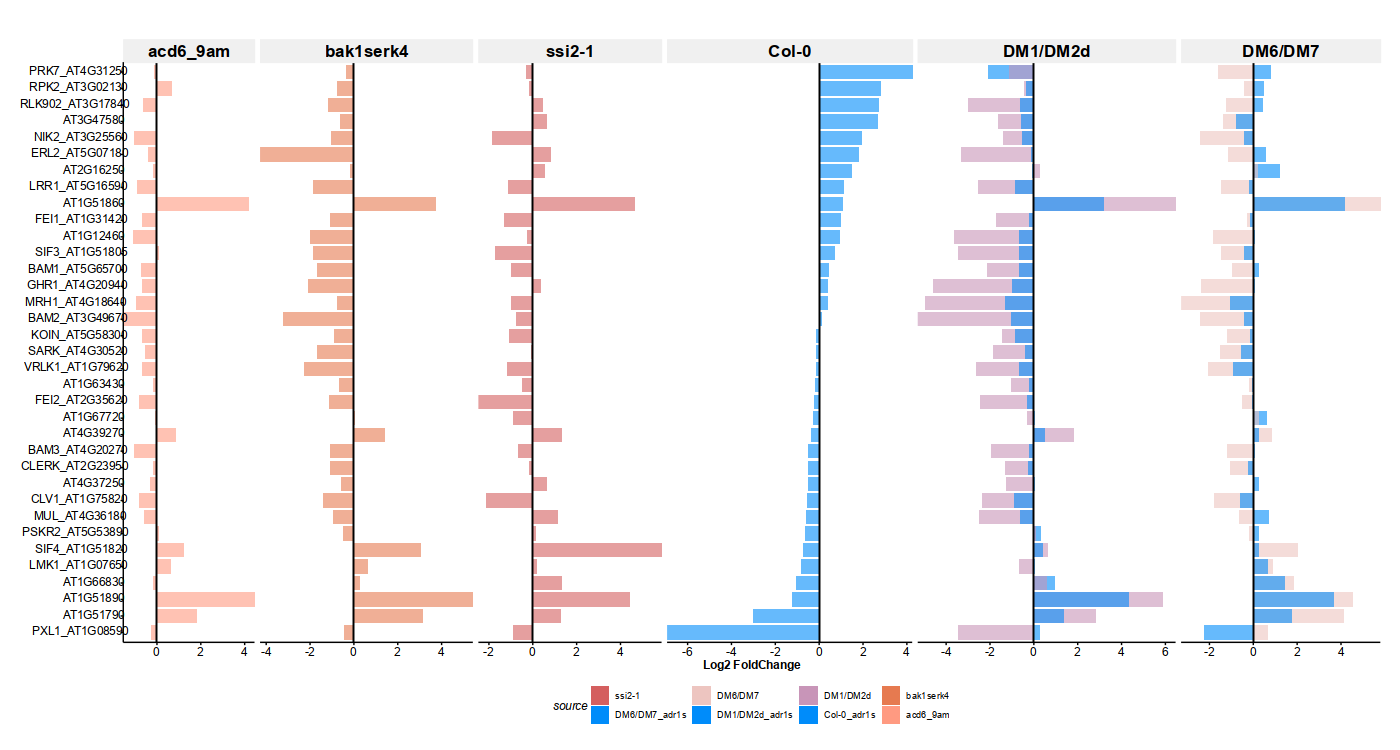

In [101]:
# For RLKs with sampling
rlk_results <- plot_gene_family_bar(
  Res_combined_symbol, 
  RLKs, 
  family_name = "RLKs", 
  sample_size = 35 #0 for not sampling
)
rlk_results$plot
rlk_results$data %>% sample_n(2)

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
AT2G33060,-1.180058,DM1/DM2d,RLP27,RLP27_AT2G33060,DM1/DM2d
AT3G23110,1.957688,bak1serk4,RLP37,RLP37_AT3G23110,bak1serk4


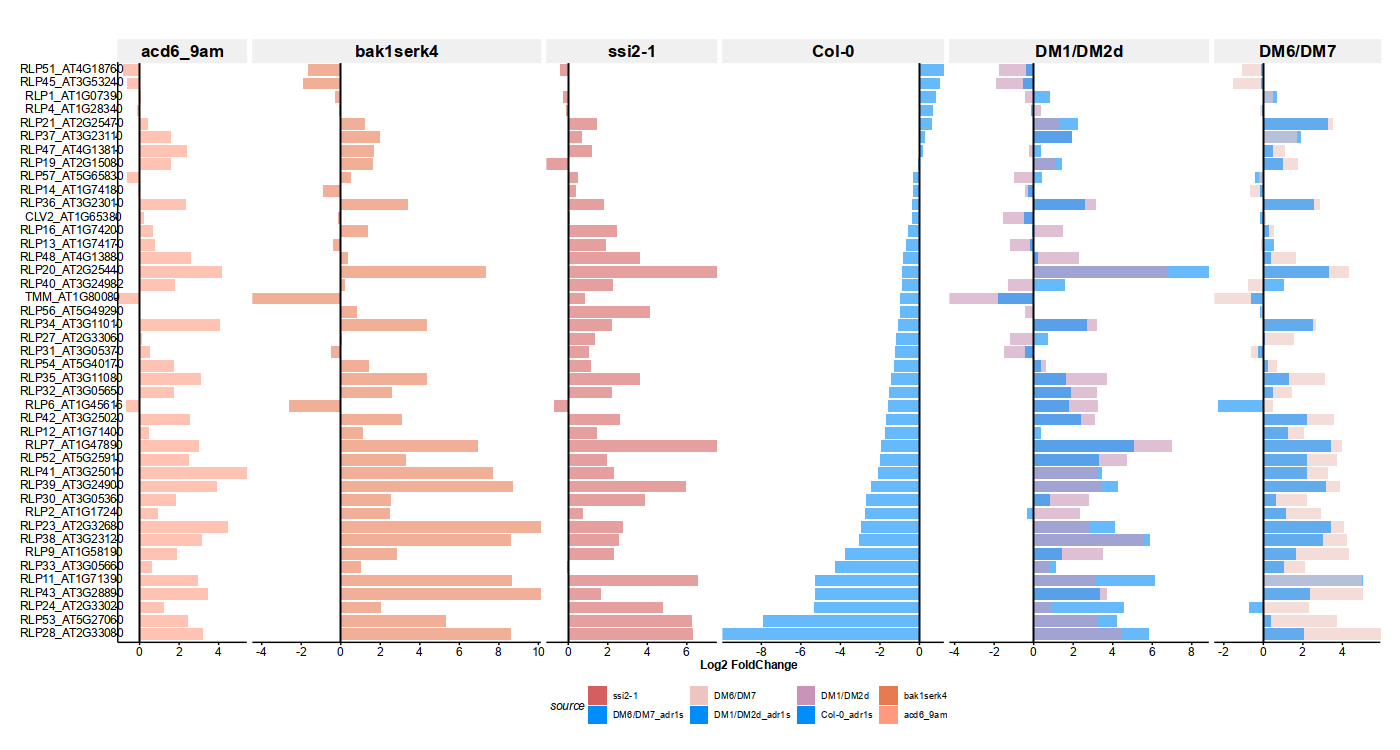

In [102]:
rlp_results <- plot_gene_family_bar(
  Res_combined_symbol, 
  RLPs, 
  family_name = "RLPs", 
  sample_size = 0 #0 for not sampling
)
rlp_results$plot
rlp_results$data %>% sample_n(2)



AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
AT5G45210,-1.388222,DM6/DM7_adr1s,AT5G45210,AT5G45210,DM6/DM7
AT3G46710,2.995895,DM1/DM2d,AT3G46710,AT3G46710,DM1/DM2d


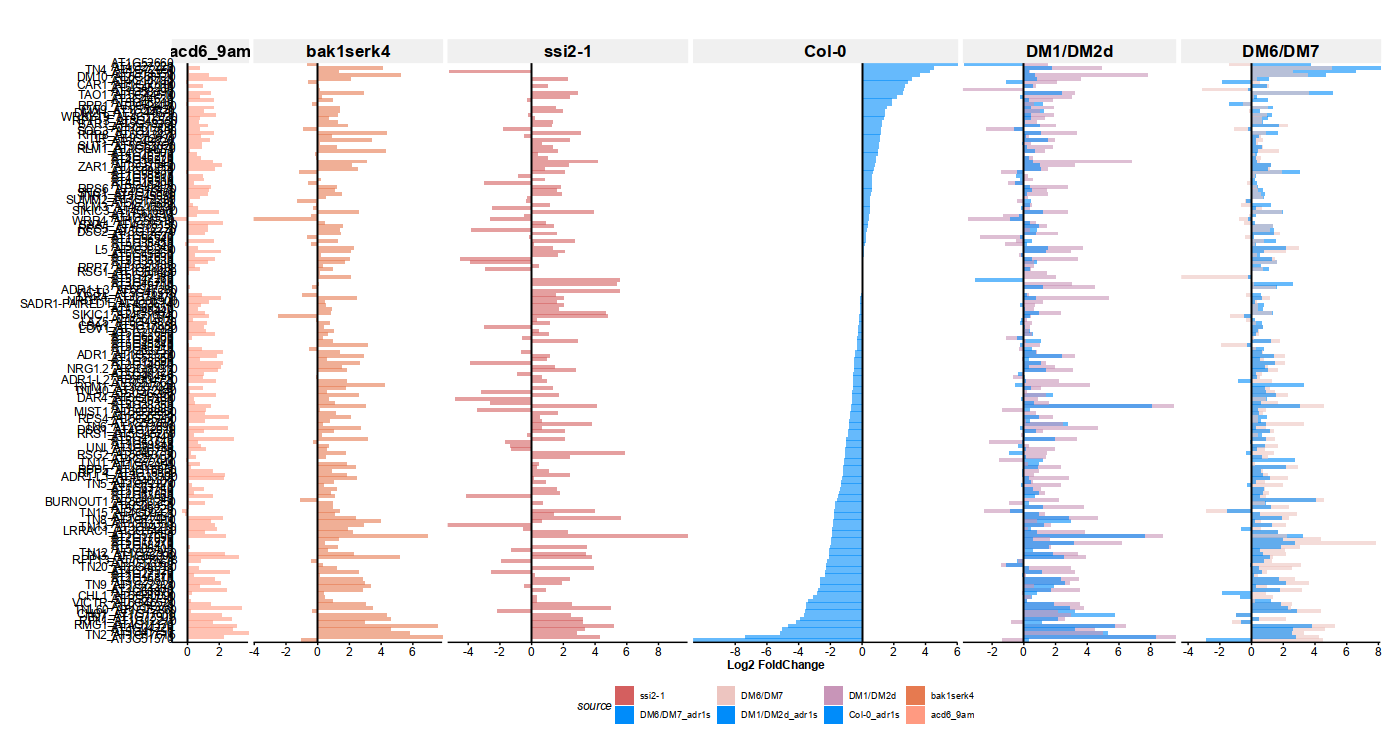

In [112]:
NLR_results <- plot_gene_family_bar(
  Res_combined_symbol, 
  NLRs_and_TIRs %>% filter( Class != 'TIR'), 
  family_name = "NLRs", 
  sample_size = 0 #0 for not sampling
)
NLR_results$plot
NLR_results$data %>% sample_n(2)

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
AT4G12010,1.025135,acd6_9am,DSC1,DSC1_AT4G12010,acd6_9am
AT4G14370,2.485046,DM6/DM7,AT4G14370,AT4G14370,DM6/DM7


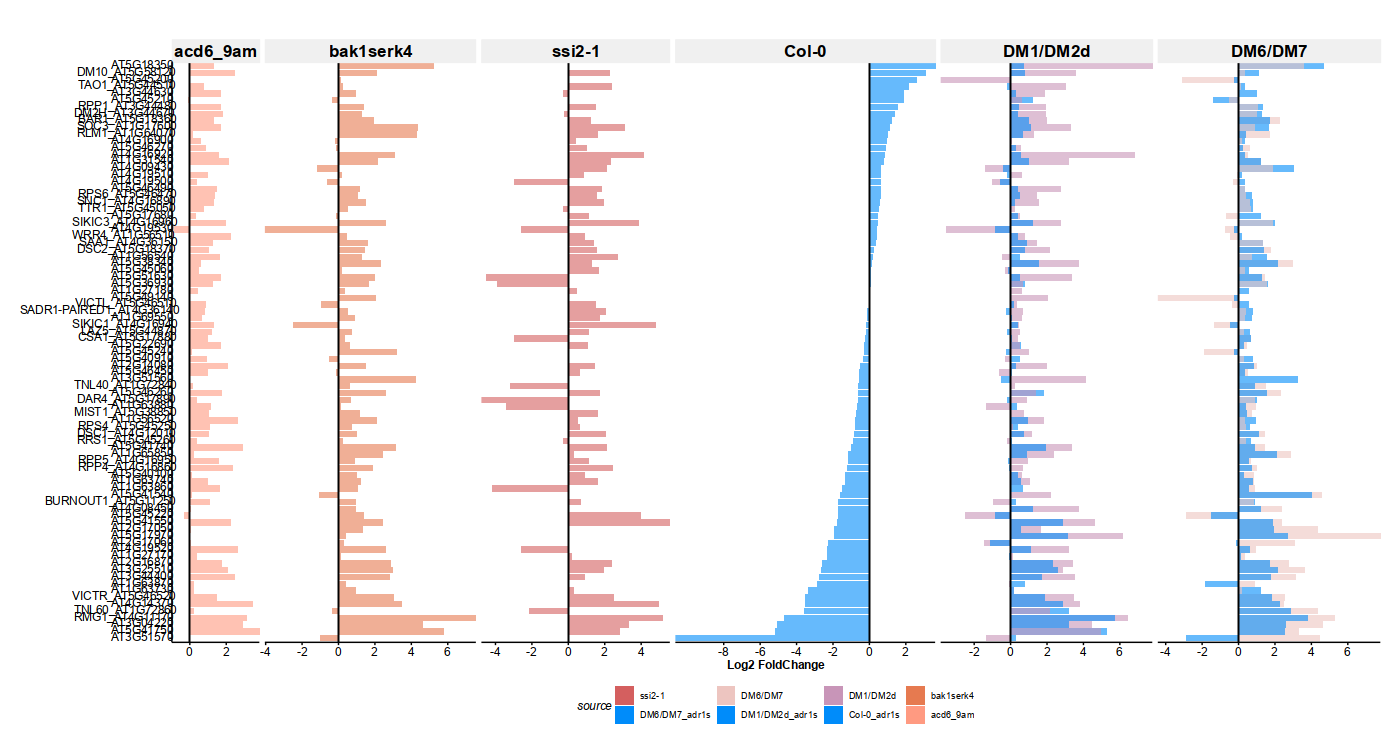

In [114]:
NLR_results <- plot_gene_family_bar(
  Res_combined_symbol, 
  NLRs_and_TIRs %>% filter( Class == 'TIR-NBS-LRR'), 
  family_name = "NLRs", 
  sample_size = 0 #0 for not sampling
)
NLR_results$plot
NLR_results$data %>% sample_n(2)

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
AT1G17610,2.120186,acd6_9am,CHS1,CHS1_AT1G17610,acd6_9am
AT1G66090,3.860527,DM1/DM2d,TN3,TN3_AT1G66090,DM1/DM2d


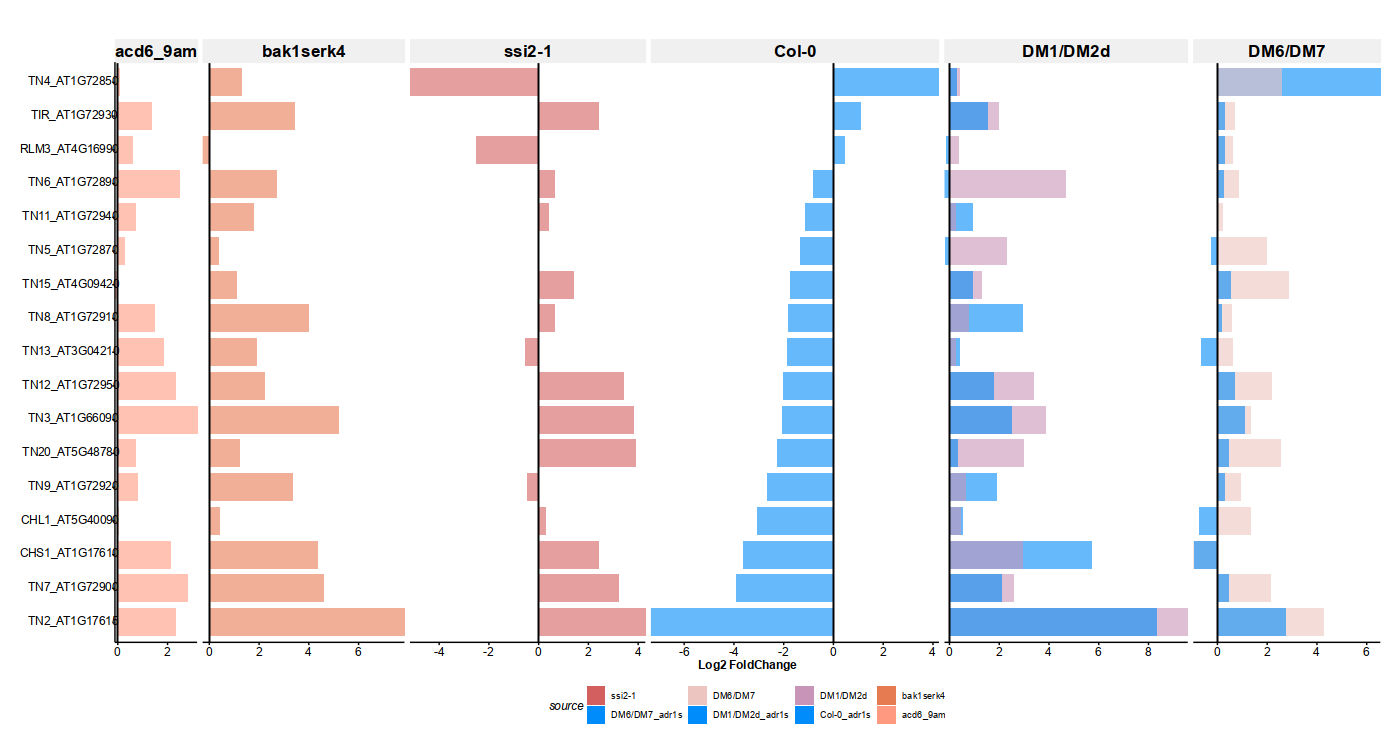

In [116]:
NLR_results <- plot_gene_family_bar(
  Res_combined_symbol, 
  NLRs_and_TIRs %>% filter( Class == 'TIR-NBS'), 
  family_name = "NLRs", 
  sample_size = 0 #0 for not sampling
)
NLR_results$plot
NLR_results$data %>% sample_n(2)

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
AT5G45000,3.522672,DM1/DM2d_adr1s,AT5G45000,AT5G45000,DM1/DM2d
AT2G20142,3.763033,DM6/DM7,AT2G20142,AT2G20142,DM6/DM7


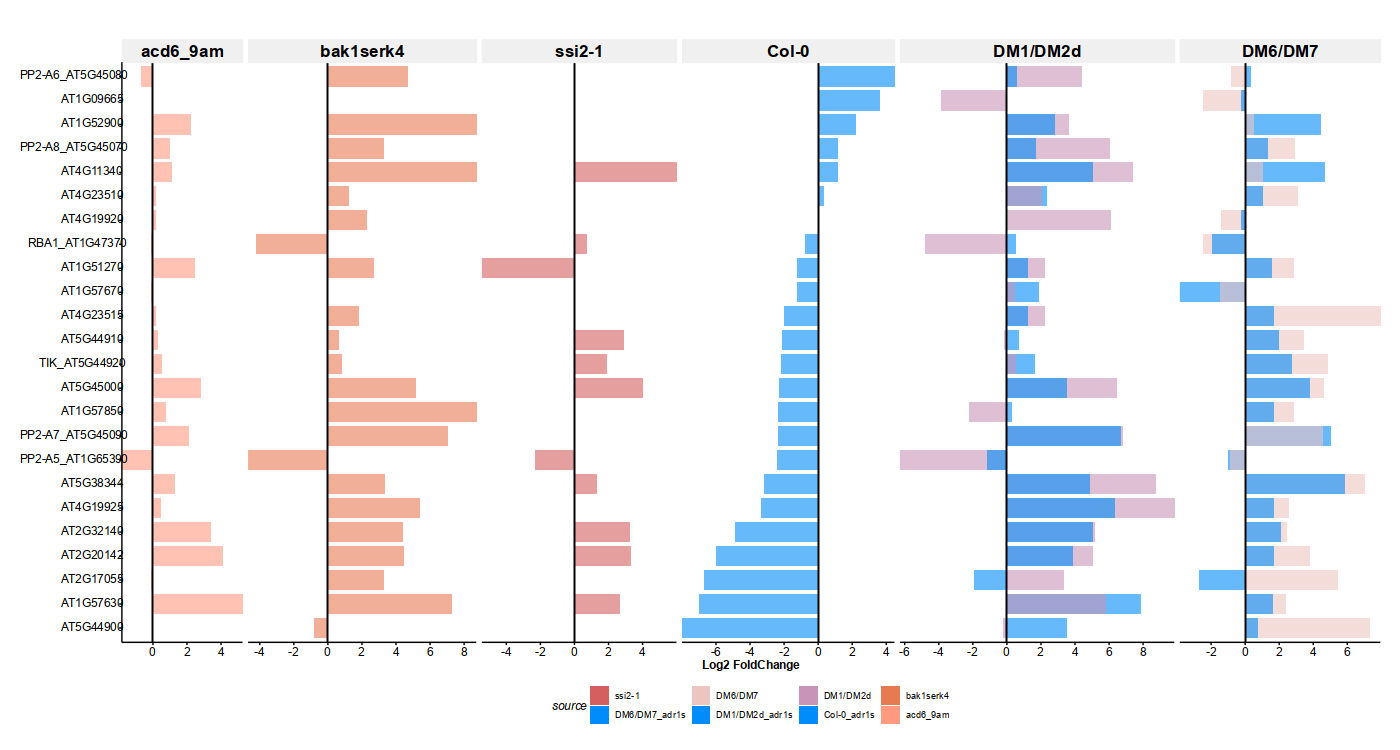

In [117]:
NLR_results <- plot_gene_family_bar(
  Res_combined_symbol, 
  NLRs_and_TIRs %>% filter( Class == 'TIR'), 
  family_name = "NLRs", 
  sample_size = 0 #0 for not sampling
)
NLR_results$plot
NLR_results$data %>% sample_n(2)

AGI,log2FC,source,Symbol,plot_label,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
AT1G53350,0.3018921,DM1/DM2d_adr1s,AT1G53350,AT1G53350,DM1/DM2d
AT5G43740,-0.2882695,bak1serk4,AT5G43740,AT5G43740,bak1serk4


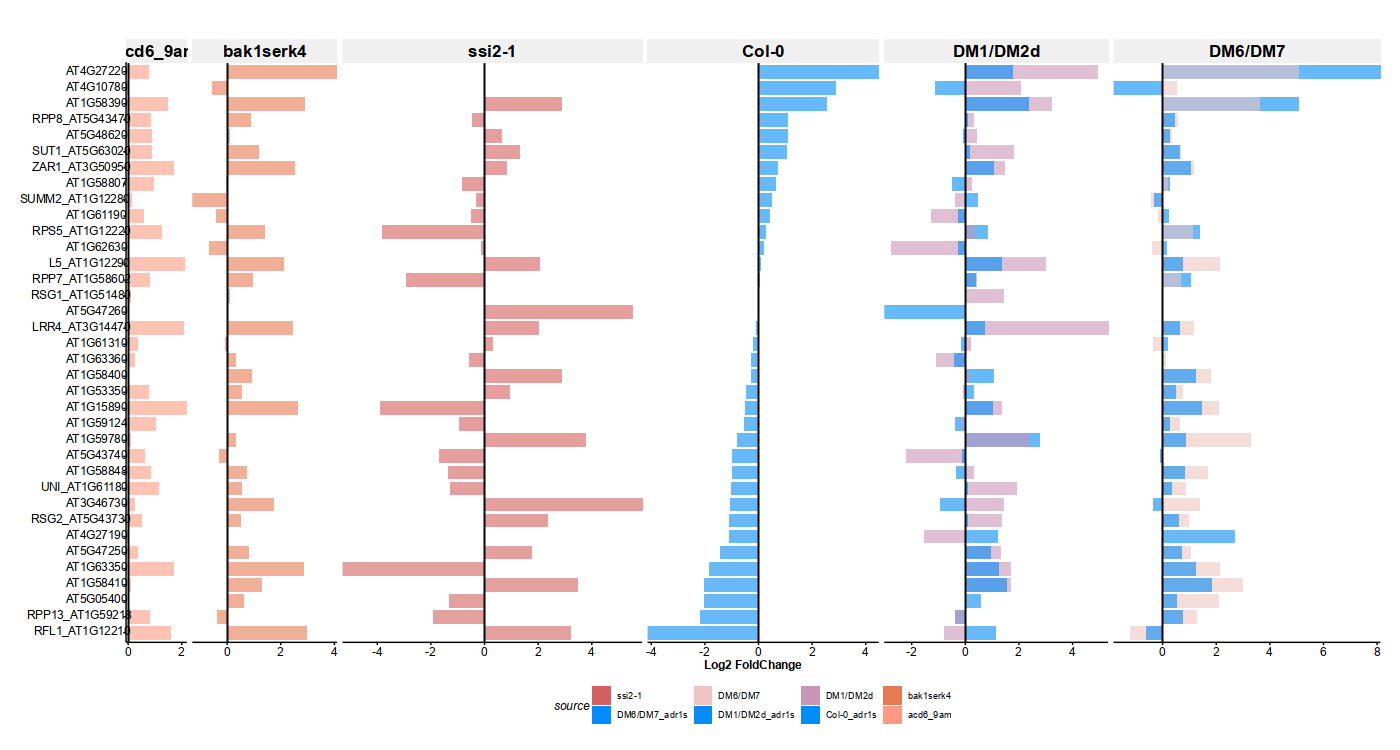

In [115]:
NLR_results <- plot_gene_family_bar(
  Res_combined_symbol, 
  NLRs_and_TIRs %>% filter( Class == 'CC-NBS-LRR'), 
  family_name = "NLRs", 
  sample_size = 0 #0 for not sampling
)
NLR_results$plot
NLR_results$data %>% sample_n(2)

### DOFs family

In [103]:
#read excel
DOF_family <- readxl::read_excel('../Pathogen_JC14_3DM/refs/DOFs_Ath.xlsx')

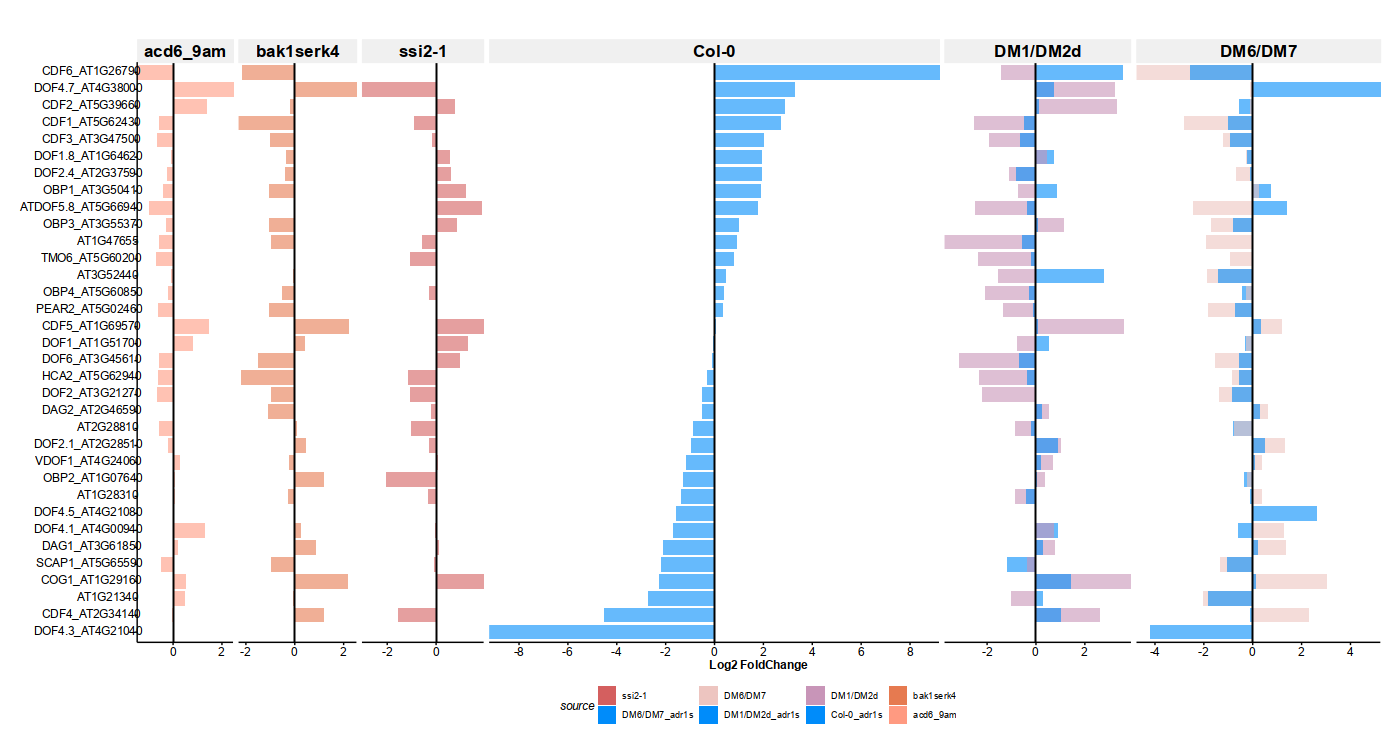

In [104]:
DOFs_plot <- plot_gene_family_bar(
  Res_combined_symbol, 
  DOF_family %>% dplyr::rename('AGI' = 'gene_id'), 
  family_name = "DOF", 
  sample_size = 100 #0 for not sampling
)
DOFs_plot$plot

### WRKY 

In [105]:
WRKY_family <- readxl::read_excel('../Pathogen_JC14_3DM/refs/WRKY_Ath.xlsx')

In [106]:
WRKY_family <- WRKY_family %>% 
  dplyr::rename('AGI' = 'Locus ID') %>% 
  filter(AGI %>% str_detect('^At')) %>%
  mutate(AGI = toupper(AGI))

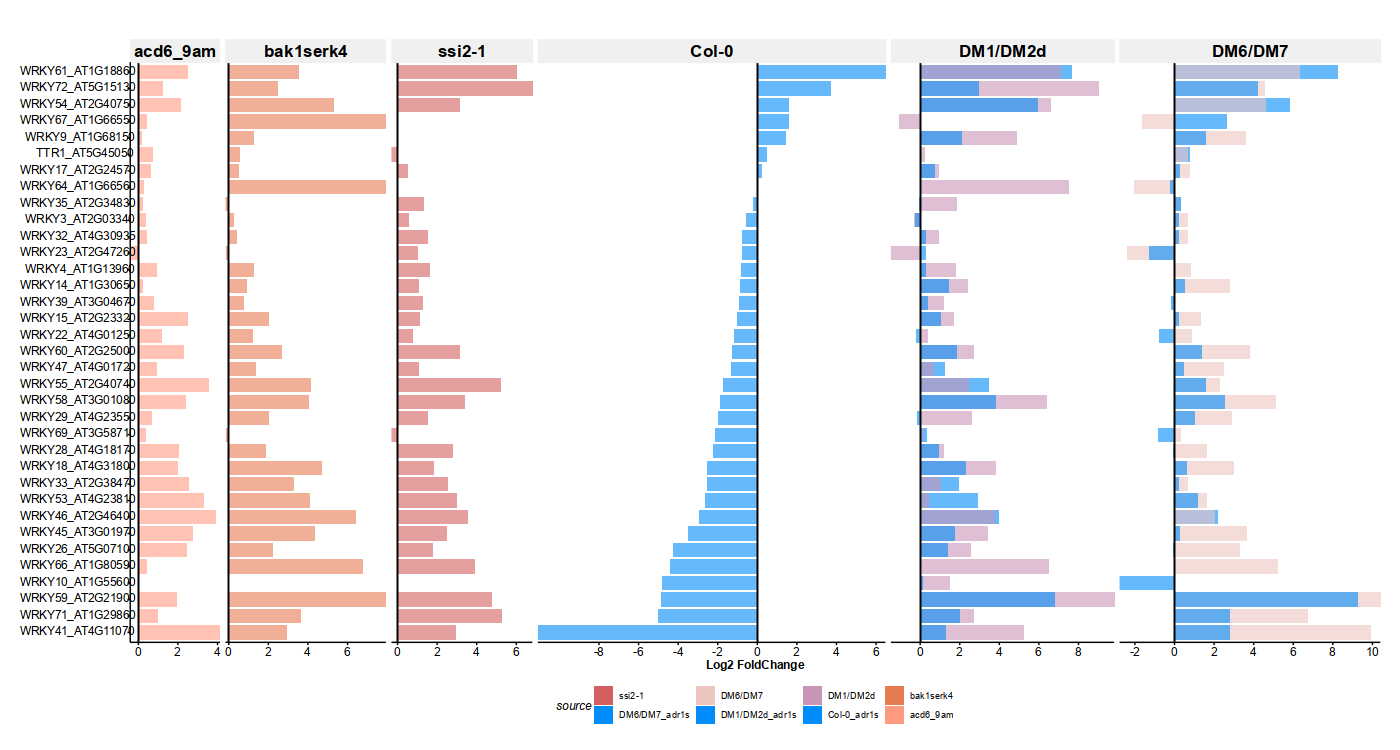

In [107]:
WRKYs_plot <- plot_gene_family_bar(
  Res_combined_symbol, 
  WRKY_family ,
  family_name = "WRKY", 
  sample_size = 35 #0 for not sampling
)
WRKYs_plot$plot

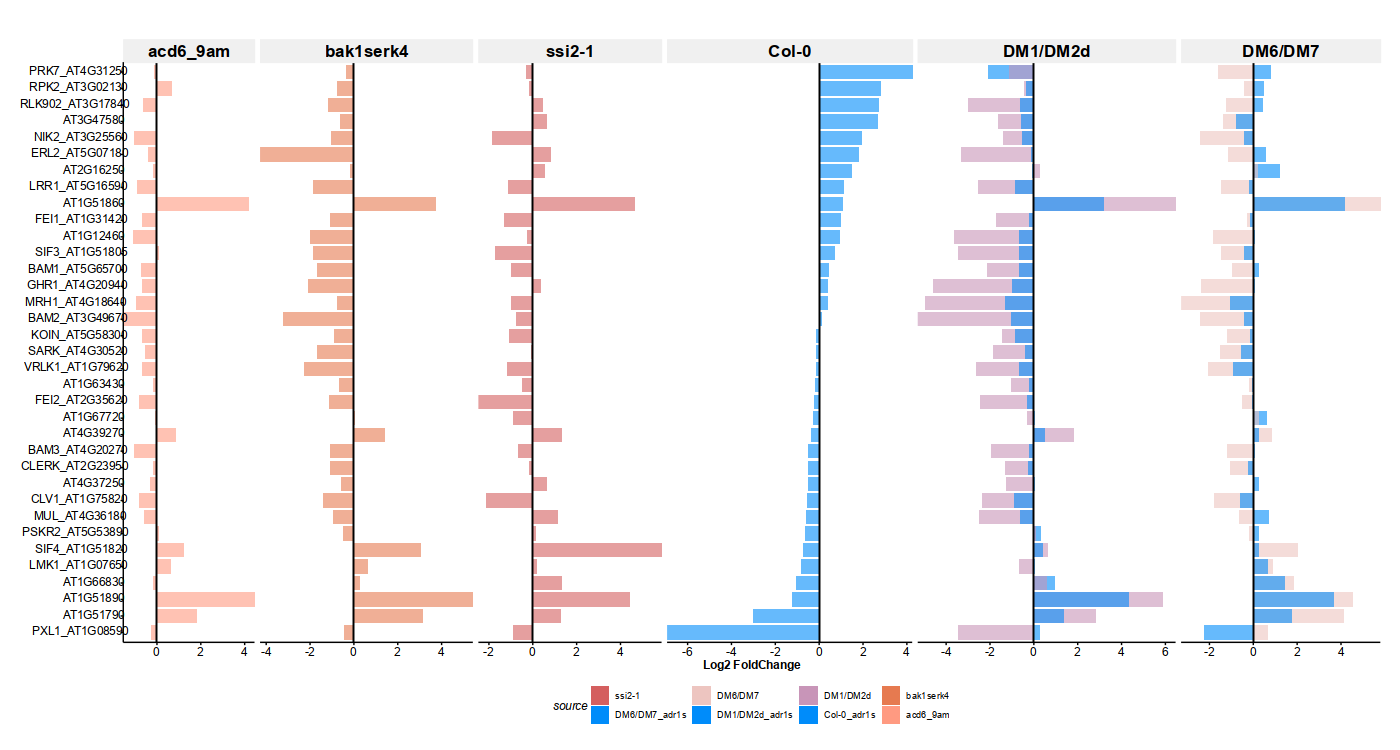

In [108]:
width_ <- 14
height_ <- 7.5
options(repr.plot.width = width_, repr.plot.height = height_, repr.plot.res = 100)
rlk_results$plot

In [109]:
rlk_results$plot %>% ggsave(filename = "plots/RLKs.pdf", width = 8, height = 5)
rlp_results$plot %>% ggsave(filename = "plots/RLPs.pdf", width = 8, height = 5)
DOFs_plot$plot %>% ggsave(filename = "plots/DOFs.pdf", width = 8, height = 5)
WRKYs_plot$plot %>% ggsave(filename = "plots/WRKYs.pdf", width = 8, height = 5)